## Overview of GenPic on GitHub

GenPic ist eine Sammlung von IPython Notebooks zur Generierung und Verwaltung von Bildern im SVG Format.

1. **GPGH01-Show-Palettes** stellt die Farbpaletten aus der Datei **color-palettes.data** da.

2. **GPGH02-Picture-Generator** generiert parametergesteuert Bilder und speichert sie als *svgz* File.

### History and Status - 20160810

The notebook *GP02-Redesign* is the base of the new development under GitHub:

- Functions and objects were taken to a module *gp-basics.py* ... as fare as possible or by dirty luke, code was not refectored as it should habe been done.

- *GPGH02-SVG-Generator* is/was the new generator notebook under the *GitHub development*

- **Line construction** is not implemented under *GP02-Rdesign* as it is under *GP02-Generator-old*. 
  Nevertheless line construction is implemented in *GPGH02-SVG-Generator*.
  
Actually improvements where made in the new files *attr_funcs.py and new_controls.ipynb* in this respository:

- Partly Redesign of *params*  to controls structure and adopting this to code

- Redesign is still running. Archivments should be integrated into the main stream.


## Picture Generator

GenPic nutzt verbreitete Standardkomponenten und Python Module.

+ Daten werden in Dateien gespeichert
    + Parameter und Farbpaletten werden in **Json** gespeichert.
    + Die Bilddaten werden in **SVG/SVGZ** gespeichert. 

+ Templates werden mit **Jinja2** erstellt.

+ Die XML Bearbeitung basiert auf **lxml**.

+ **Numpy** wird zur Array und List Generierung genutzt

### Roadmap

1) Zunächst Ertellung guter, einfacher und ausbaufähiger Basis-Module:
  + zur Lösung folgender Aufgaben:
    * Datenspeicherung: Files und ggf. alternativ auch Datenbank
    * Parameter-Steuerungskonzept und Aufbau
    * Figuren und Bildergenerierung
    * Farbpalettenverwaltung
    * Parameterverwaltung
  
  + Strukturiert in Funktionen und Objekten
  
  + klar strukturierte und dokumentierte Json Nutzung für Parameter
  
  + Nutzung von Generics, Abstraktion ....
 
  + **Alles gut progammiert, dokumentiert und testautomatisiert.**
  
2) Einfache ipynb's für Workflow:  
  + Farbpalette auswählen, bzw. erstellen
  + Komfortable und flexible SVG Generierung
  + Generierung von HTML Katalogen
  + *ggf. Bildermutationen etc. aus existierenden Bildern:*
    - z.B. Reihenfolge oder Figuren ändern, Bilder mischen etc.
  + Gut progammiert, dokumentiert und testautomatisiert.

3) Basis zum Aufbau einer Community schaffen
  + Nutzung und Darstellung in GitHub
  + Erstellung eines Wicki (siehe d3.js) - auch/insbesondere durch User:
    * Anleitungen z.B. für Konvertierung der Bilder in das png Format
    * Diskussion zur Nutzung von Parametern und Farbpaletten für Bilder
    * Einstellung und Erzeugung von Bildern
    * Nutzung eigener *Picture Structures* und *Figures*

#### Aktuelle to do's

**Offen**:

+ Bilder mit Gridmuster können nicht erstellt werden 
  
+ gp_basics.py ist nicht ausreichend dokumentiert

**Erledigt**:

### Import Modules and Constants

In [1]:
from gp_basics import *

###  Line Construction

In [54]:
nr_of_origins = 12
nr_of_lines = 18

origins_x_area = (0, 50)
origins_y_area = (100, 100)

target_x_area = (95, 100)
target_y_area = (0, 0)

# Define starting points for the lines
origins =[]
targets =[]
for i in range(nr_of_origins):
    origins.append((randint(origins_x_area[0], origins_x_area[1]),
                    randint(origins_y_area[0], origins_y_area[1])))
for i in range(nr_of_lines):
    targets.append((randint(target_x_area[0], target_x_area[1]),
                    randint(target_y_area[0], target_y_area[1])))

# Define lines
lines =[]
for i in range(nr_of_lines):
    p1 = choice(origins)
    p2 = choice(targets)
    lines.append((p1[0], p1[1], p2[0], p2[1]))

## Produce Pictures

In [3]:
import copy
from IPython.display import HTML, SVG

In [114]:
# Define basic picture attributtes for the pictures SVG template  like size, background ...
pic_attribs = {'svg_width':'21in', 'svg_height':'21in',
        'w_points':'100', 'h_points':'100',
        'fill':'sand', 
        'opacity':'.8',
        'stroke':'white',
        'stroke_opacity':'.3', 
        'stroke_width':'0.1'}

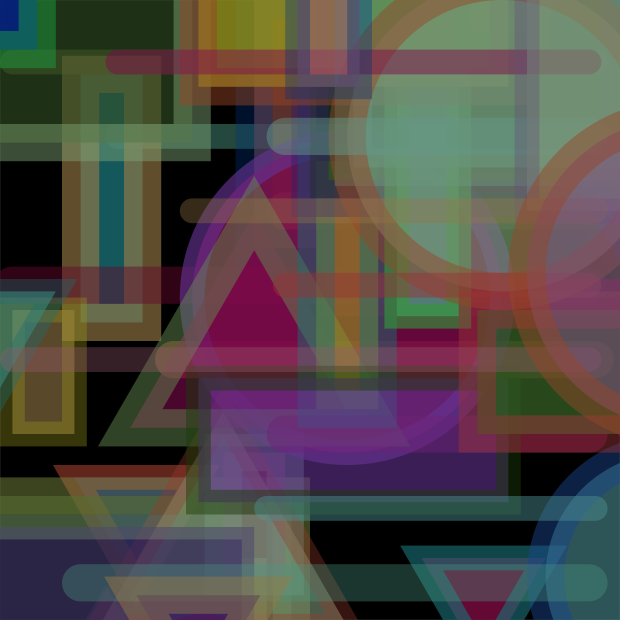

In [123]:
color_id = 651
nr_of_figures = 56
# set the colors
palette = get_palette(color_id)
params ={}
params['structure'] = 'RANDOM'
params['colorid'] = color_id
params['palette'] = rgb_list
params['nr_of_figures'] = nr_of_figures
figs_to_choice = ( 'rect' , 'polygon', 'circle',  'rect' , 'polygon', 'circle','rect' ,'rect' ,
                  'line',) #'rect', 'circle', 'polygon',
#params['figures'] = [random.choice(figs_to_choice) for i in range(nr_of_figures)]
params['figures'] = ('rc', [figs_to_choice, ]) 

# params for creation of circles rects and polygons(triangles) 
params['x'] = ('ri', [-20, 120])
params['y'] = ('ri', [-20, 120])
params['height'] = ('rc', ([40, 20,   ], ))
params['width'] = ('rc', ([50, 10, ], ))

# params for line creation
params['x1'] = ('ar', ([l[0] for l in lines], ))
#params['y1'] = ('ar', ([l[1] for l in lines], ))
params['x2'] = ('ar', ([l[2] for l in lines], ))  #('ri', [0, 100])
#params['y2'] = ('ar', ([l[3] for l in lines], ))
y1_list = list(range(10, 100, 12)) * int((nr_of_figures / 3))
params['y1'] = ('ar', (y1_list, ))
y2_list = copy.deepcopy(y1_list)
params['y2'] = ('ar', (y2_list, ))

# params for svg style 
params['fill'] = ('rc', [rgb_list[:],] )
params['opacity'] = ('rc', [( .6, .8), ]) 
params['stroke'] = ('rc', [rgb_list[:],] )
params['stroke-linecap'] = ('rc', (["round",], ))
params['stroke-opacity'] = ('rc', [( .8, .6), ])
params['stroke-width'] = ('rc', [(6, 4  ), ])
params['transform'] = ('rc', [[ 0, 180  ], ])

svg = SVGPicture(params, pic_attribs=pic_attribs) 
SVG(svg.xml_to_string().replace('21in', '620px'))

### RGB Colors by random

In [6]:
from random import randrange

def rgb_rand(step=3):
    return randrange(0, 255, step)

def rgb2svg(r, g, b):
    return 'rgb({}, {}, {})'.format(r, g, b)

In [79]:
circles = []
rgb_list = []
for i in range(6):
    circles.append('<tr>')
    for j in range(6):
        rgb_list.append(rgb2svg(randrange(0,175,25),
                                randrange(10,170,10),randrange(10,150,5)))
        s = '<td>' + circle.format(rgb_list[-1]) + '</td>'
        circles.append(s)
    circles.append('</tr>')
html_text = header + '\n'.join(circles) + tail

HTML(html_text)

,,,,,
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,


In [8]:
header = """<html><head>
<h5>A random generated Colorpalette</b></h5>
<style type="text/css">
    .circle { width:2%; padding:20px 20px;
    margin:0 auto; border:0px solid #a1a1a1;
    border-radius:20px; }
</style>
</head> <body><table border="1">\n""" 
    
tail = "\n </table></body> </html>"
    
circle = '\t<div class="circle" style="background-color:{};"></div>'

## Save Picture To File

In [124]:
svg.to_file(zip = False)

20160811-0032-25245412


In [ ]:
svg_list = svg.xml_to_string().split('\n')

In [ ]:
for l in svg_list:
    if l[1:5] == 'line': print(l)

In [ ]:
print(svg_list[10:25])

In [ ]:
print(json.dumps(params, indent = 2))